# **Analysis Data Project: Bike Sharing**
- **Nama:** Muhammad Sahrul
- **Email:** m.sahrul59@gmail.com
- **ID Dicoding:** sahrul57

## **Defining the Business Question**

- Does seasonality affect bikeshare usage?
- Do usage trends vary by membership type?
- Does weather affect bikeshare usage?

## **Dataset Information**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.


Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## **Attribute Information**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index </br>
dteday : date </br>
season : season (1:springer, 2:summer, 3:fall, 4:winter) </br>
yr : year (0: 2011, 1:2012) </br>
mnth : month ( 1 to 12) </br>
hr : hour (0 to 23) </br>
holiday : weather day is holiday or not (extracted from [Web Link]) </br>
weekday : day of the week </br>
workingday : if day is neither weekend nor holiday is 1, otherwise is 0. </br>
weathersit : </br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy </br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist </br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + * * Scattered clouds </br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </br>
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) </br>
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) </br>
hum: Normalized humidity. The values are divided to 100 (max) </br>
windspeed: Normalized wind speed. The values are divided to 67 (max) </br>
casual: count of casual users </br>
registered: count of registered users </br>
cnt: count of total rental bikes including both casual and registered </br>

## **Import Packages/Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

## **Data Wrangling**

### **Gathering Data**

In [3]:
dailysharing_df = pd.read_csv("/content/day.csv")
dailysharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hourlysharing_df = pd.read_csv("/content/hour.csv")
hourlysharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
dailysharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
hourlysharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### **Assessing Data**

#### **Menilai tabel `dailysharing_df`**

In [7]:
dailysharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
dailysharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Number of duplications: ", dailysharing_df.duplicated().sum())

Number of duplications:  0


In [10]:
dailysharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Menilai tabel `dailysharing_df`**

In [11]:
hourlysharing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hourlysharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Number of duplications: ", hourlysharing_df.duplicated().sum())

Number of duplications:  0


In [14]:
hourlysharing_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
hourlysharing_df.value_counts()

instant  dteday      season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  atemp   hum   windspeed  casual  registered  cnt
1        2011-01-01  1       0   1     0   0        6        0           1           0.24  0.2879  0.81  0.0000     3       13          16     1
11592    2012-05-03  2       1   5     4   0        4        1           2           0.46  0.4545  0.88  0.2537     0       2           2      1
11578    2012-05-02  2       1   5     14  0        3        1           1           0.62  0.6061  0.69  0.0896     51      189         240    1
11579    2012-05-02  2       1   5     15  0        3        1           1           0.64  0.6061  0.65  0.1940     52      204         256    1
11580    2012-05-02  2       1   5     16  0        3        1           1           0.64  0.6061  0.65  0.1642     54      313         367    1
                                                                                                                                       

In the **daily_df** & **hourly_df** tables, there are no problems with Missing Value, Duplicate Data, and Inaccurate value. However, there is a problem with the data type that we will change in the Data Cleaning stage.

### **Cleaning Data**

#### **Clean up `daily_df` & `hourly_df` tables**

Fixed Data Type

In [16]:
dailysharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [17]:
def fixing_datatypes(df):
    # Memperbaiki Tipe Data
    df['dteday'] = df['dteday'].astype('datetime64')
    df.loc[:,'season':'mnth'] = df.loc[:,'season':'mnth'].astype('category')
    df[['holiday','workingday']] = df[['holiday','workingday']].astype('bool')
    df[['weekday','weathersit']] = df[['weekday','weathersit']].astype('category')

    # Dapatkan Nama yang Berarti untuk Variabel kategorikal
    mapping_season = {1:"1_Winter", 2:"2_Spring", 3:"3_Summer", 4:"4_Fall" }
    mapping_weekdays = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",
                        4:"Thursday", 5:"Friday", 6:"Saturday"}
    mapping_weather = {1:"good", 2:"medium", 3:"poor", 4:"very_poor" }

    df["season"] = df.season.map(mapping_season)
    df["weekday"] = df.weekday.map(mapping_weekdays)
    df["weathersit"] = df.weathersit.map(mapping_weather)

    return df

1. **df['dteday'] = df['dteday'].astype('datetime64')**: Changes the data type of the 'dteday' column to datetime64 data type. This is useful if the 'dteday' column was previously in date format.
2. **df.loc[:,'season':'mnth'] = df.loc[:,'season':'mnth'].astype('category')**: Changes the data type of the columns from 'season' to 'mnth' to a category data type. This is useful if these columns only have a few different unique values and can be considered a category.
3.**df[['holiday','workingday']] = df[[['holiday','workingday']].astype('bool')**: Changes the data type of the 'holiday' and 'workingday' columns to a boolean data type, which means they only have two possible values, True or False.
4. **df[['weekday','weathersit']] = df[[['weekday','weathersit']].astype('category')**: Changes the data type of the 'weekday' and 'weathersit' columns to the category data type, as these columns can also be considered as categories.
5. Next, the code creates several dictionaries that are used to map the values in certain columns into more meaningful values. For example, in the 'season' column, the number 1 can be replaced with "1_Winter", 2 with "2_Spring", and so on.
6. Then, it replaces the values in the 'season', 'weekday', and 'weathersit' columns with more meaningful values according to the dictionaries that have been created. This aims to make the data easier to read and understand.
7. Finally, this function returns the modified DataFrame.

 The next step apply the function to the data frame. And also fix the variable 'hr' (hour) which only exists in the hourly dataframe.

In [18]:
dailysharing_df = fixing_datatypes(dailysharing_df)
hourlysharing_df = fixing_datatypes(hourlysharing_df)

hourlysharing_df['hr'] = hourlysharing_df['hr'].astype('category')

In [19]:
dailysharing_df.set_index('dteday', inplace=True)


In [20]:
dailysharing_df[['temp','hum','windspeed']].describe()

,temp,hum,windspeed
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486
std,0.183051,0.142429,0.077498
min,0.059130,0.000000,0.022392
25%,0.337083,0.520000,0.134950
50%,0.498333,0.626667,0.180975
75%,0.655417,0.730209,0.233214
max,0.861667,0.972500,0.507463


## **Exploratory Data Analysis (EDA)**

### **Explore `dailysharing_df`**

In [21]:
dailysharing_df.sample(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-04-02,92,2_Spring,0,4,False,Saturday,False,medium,0.315000,0.315637,0.653750,0.197146,898,1354,2252
2012-08-19,597,3_Summer,1,8,False,Sunday,False,medium,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
2012-10-28,667,4_Fall,1,10,False,Sunday,False,medium,0.477500,0.467771,0.694583,0.398008,998,3461,4459
2012-06-15,532,2_Spring,1,6,False,Friday,True,good,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
2011-07-09,190,3_Summer,0,7,False,Saturday,False,good,0.733333,0.664158,0.609167,0.167912,1988,3348,5336


In [22]:
dailysharing_df.describe(include="all")


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12.0,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3_Summer,1.0,1.0,False,Sunday,True,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62.0,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### **Conditional Means**

The average rentals per day for all observations were measured.

In [23]:
dailysharing_df['cnt'].mean()

4504.3488372093025

Now calculating the average rentals broken down by different weather locations. It seems that people are more likely to use a bike if the weather is better. Makes more sense.

In [24]:
dailysharing_df.groupby('weathersit')['cnt'].mean()

weathersit
good      4876.786177
medium    4035.862348
poor      1803.285714
Name: cnt, dtype: float64

Because it sets the date in datetime-Format as index, besides, it can get conditional means with **resample()** to aggregate the year and month. Don't be confused by the result. This is an average over two full years and not just for New Year's Eve. Rents were clearly higher in 2012 than in 2011, but two years is not enough to do a time series analysis here. If you live in January 2013 and want to make predictions for this year, it would be difficult to use this trend. It could be that 2011 was the first year of business and customers had to get used to the whole bike thing.

In [25]:
dailysharing_df.resample('A').cnt.mean()


dteday
2011-12-31    3405.761644
2012-12-31    5599.934426
Freq: A-DEC, Name: cnt, dtype: float64

In addition to the year, you can also use the month

In [26]:
dailysharing_df.resample('M').cnt.mean()

dteday
2011-01-31    1231.903226
2011-02-28    1721.964286
2011-03-31    2065.967742
2011-04-30    3162.333333
2011-05-31    4381.322581
2011-06-30    4783.733333
2011-07-31    4559.387097
2011-08-31    4409.387097
2011-09-30    4247.266667
2011-10-31    3984.225806
2011-11-30    3405.566667
2011-12-31    2816.870968
2012-01-31    3120.774194
2012-02-29    3556.448276
2012-03-31    5318.548387
2012-04-30    5807.466667
2012-05-31    6318.225806
2012-06-30    6761.000000
2012-07-31    6567.967742
2012-08-31    6919.451613
2012-09-30    7285.766667
2012-10-31    6414.225806
2012-11-30    5088.800000
2012-12-31    3990.741935
Freq: M, Name: cnt, dtype: float64

Here it combines both years, so winter means both winters (2011 and 2012), therefore it should use **groupby()** instead of **resample()**. On an average summer day, more bikes are rented than a typical winter day.

In [27]:
dailysharing_df.groupby('season')['cnt'].mean()


season
1_Winter    2604.132597
2_Spring    4992.331522
3_Summer    5644.303191
4_Fall      4728.162921
Name: cnt, dtype: float64

There seems to be almost no difference between weekdays and weekends, but on holidays fewer bikes are rented.



In [28]:
dailysharing_df.groupby('workingday')['cnt'].mean()

workingday
False    4330.168831
True     4584.820000
Name: cnt, dtype: float64

In [29]:
dailysharing_df.groupby('holiday')['cnt'].mean()

holiday
False    4527.104225
True     3735.000000
Name: cnt, dtype: float64

No one uses a bicycle on a day with bad weather, if it is a holiday. Another possibility is that there are no holidays with bad weather.

In [30]:
dailysharing_df.groupby(['holiday','weathersit'])['cnt'].mean()

holiday  weathersit
False    good          4905.154018
         medium        4061.684647
         poor          1803.285714
True     good          4029.533333
         medium        2998.666667
         poor                  NaN
Name: cnt, dtype: float64

On weekends, the situation is different. For different weather locations, there is not much difference between weekdays and weekends.

In [31]:
dailysharing_df.groupby(['workingday','weathersit'])['cnt'].mean()


workingday  weathersit
False       good          4587.269231
            medium        3936.828571
            poor          1815.400000
True        good          5023.902280
            medium        4075.028249
            poor          1799.500000
Name: cnt, dtype: float64

If we compare the holiday effect with the weekday effect, we can see a similar pattern.

In [32]:
dailysharing_df.groupby(['holiday','season'])['cnt'].mean()

holiday  season  
False    1_Winter    2640.994253
         2_Spring    4994.177778
         3_Summer    5642.923913
         4_Fall      4752.680233
True     1_Winter    1687.857143
         2_Spring    4909.250000
         3_Summer    5707.750000
         4_Fall      4025.333333
Name: cnt, dtype: float64

In [33]:
dailysharing_df.groupby(['workingday','season'])['cnt'].mean()

workingday  season  
False       1_Winter    2257.098361
            2_Spring    5142.428571
            3_Summer    5474.666667
            4_Fall      4606.210526
True        1_Winter    2780.541667
            2_Spring    4926.664062
            3_Summer    5718.114504
            4_Fall      4785.611570
Name: cnt, dtype: float64

## **Visualization & Explanatory Analysis**

### **Does seasonality affect bikeshare usage?**

<ipython-input-34-0af70eefe864>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dailysharing_df[['season', 'cnt']],


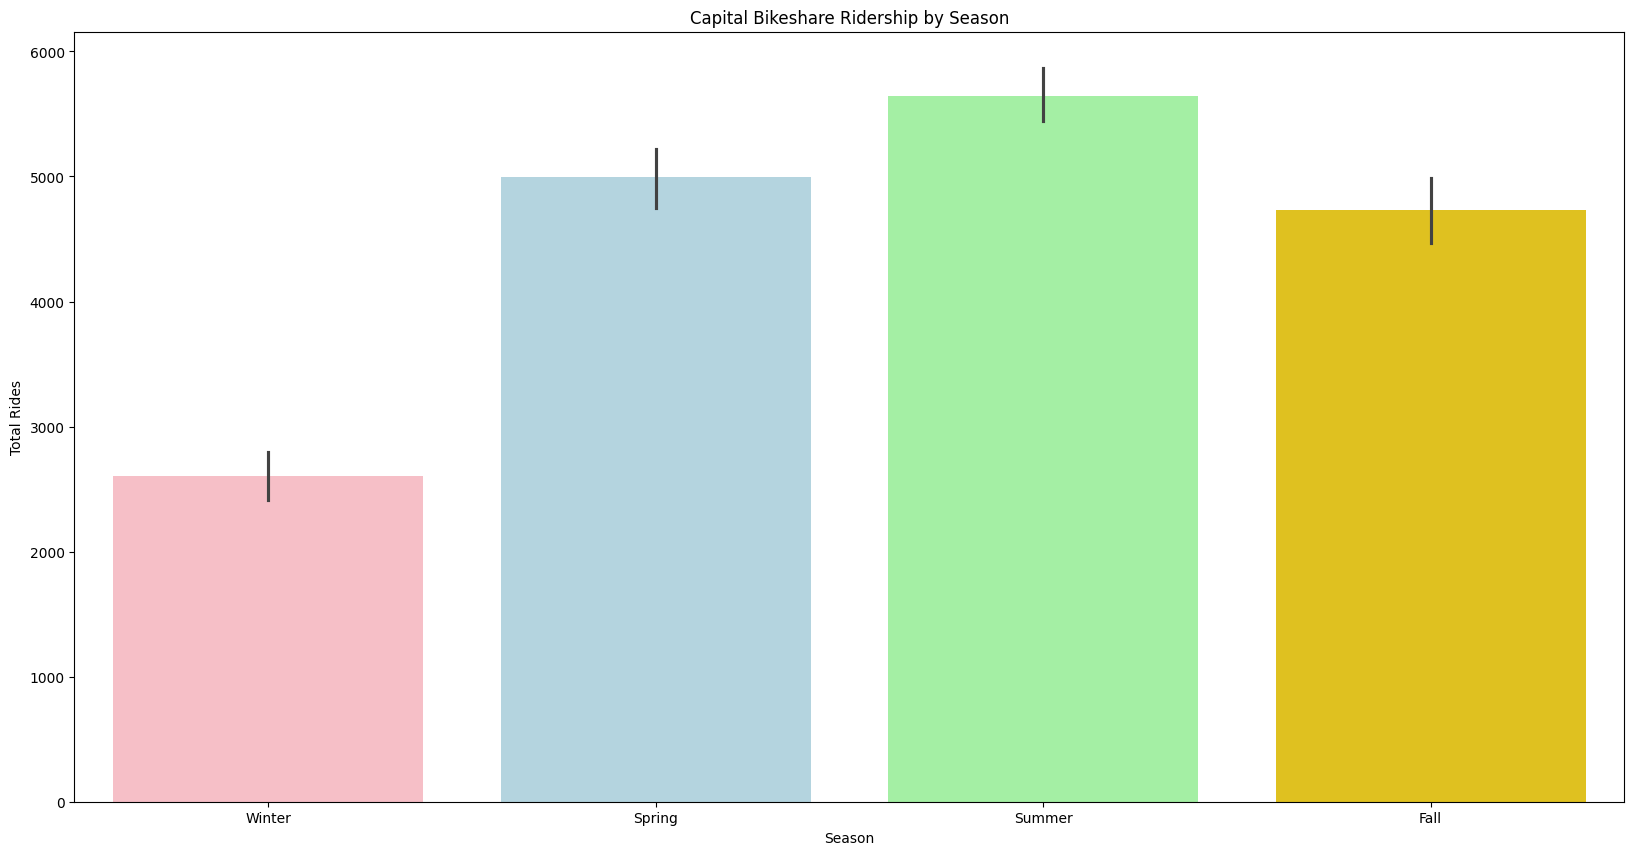

In [34]:
fig, ax = plt.subplots()
colors = ['#FFB6C1', '#ADD8E6', '#98FB98', '#FFD700']
sns.barplot(data=dailysharing_df[['season', 'cnt']],
            x='season',
            y='cnt',
            ax=ax,
            palette=colors)

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')

tick_val = [0, 1, 2, 3]
tick_lab = ['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)

plt.show()

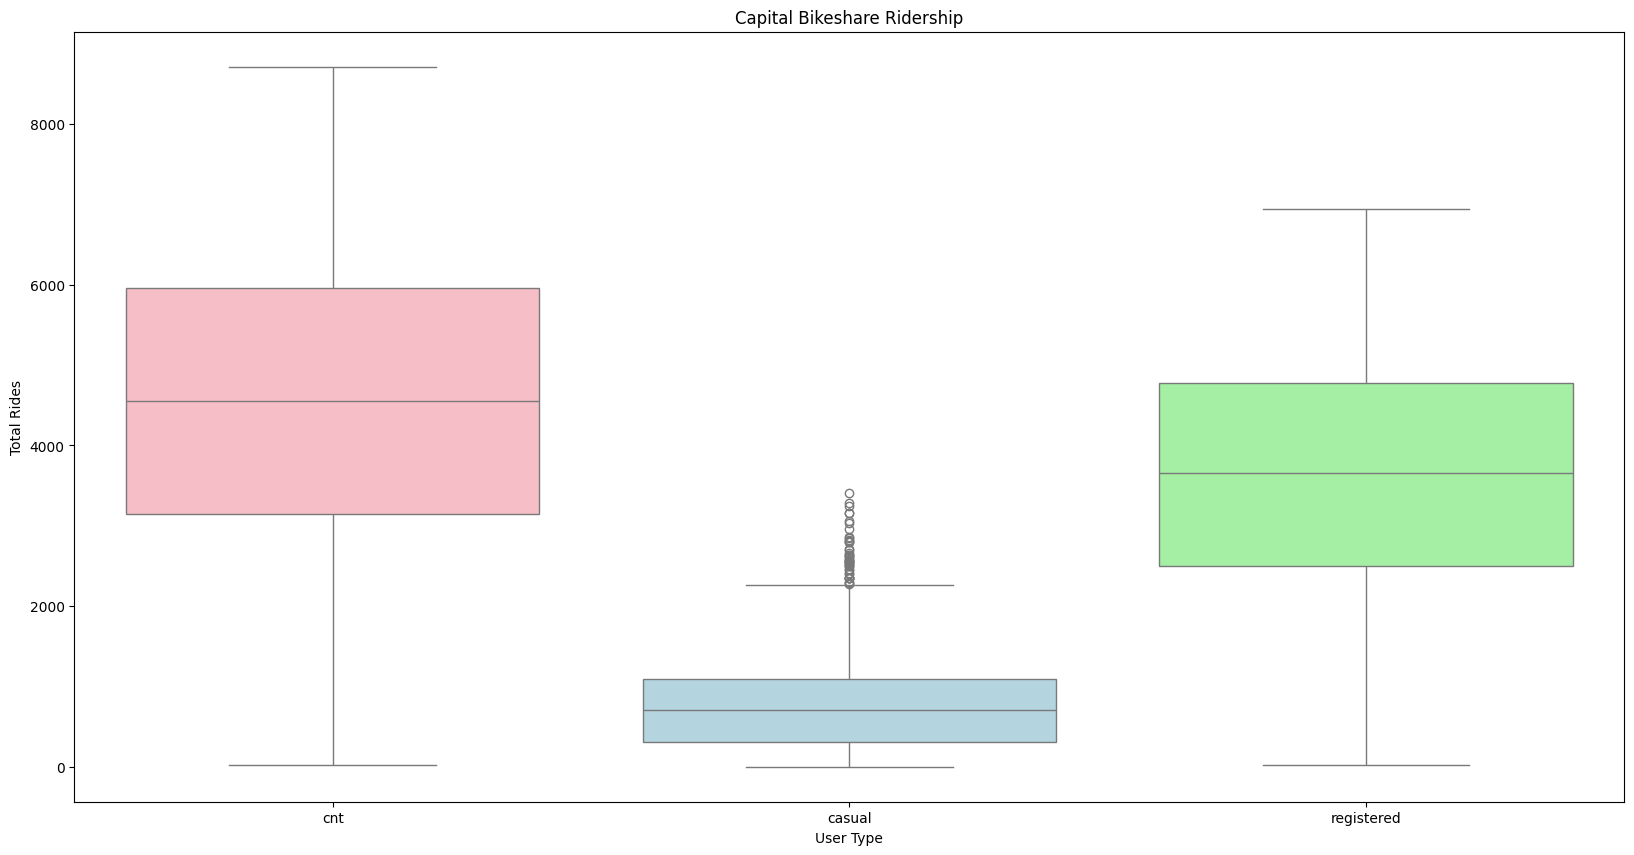

In [35]:
fig, ax = plt.subplots()
colors = ['#FFB6C1', '#ADD8E6', '#98FB98']
sns.boxplot(data=dailysharing_df[['cnt', 'casual', 'registered']],
            ax=ax,
            palette=colors)

plt.title('Capital Bikeshare Ridership')
plt.ylabel('Total Rides')
plt.xlabel('User Type')

plt.show()

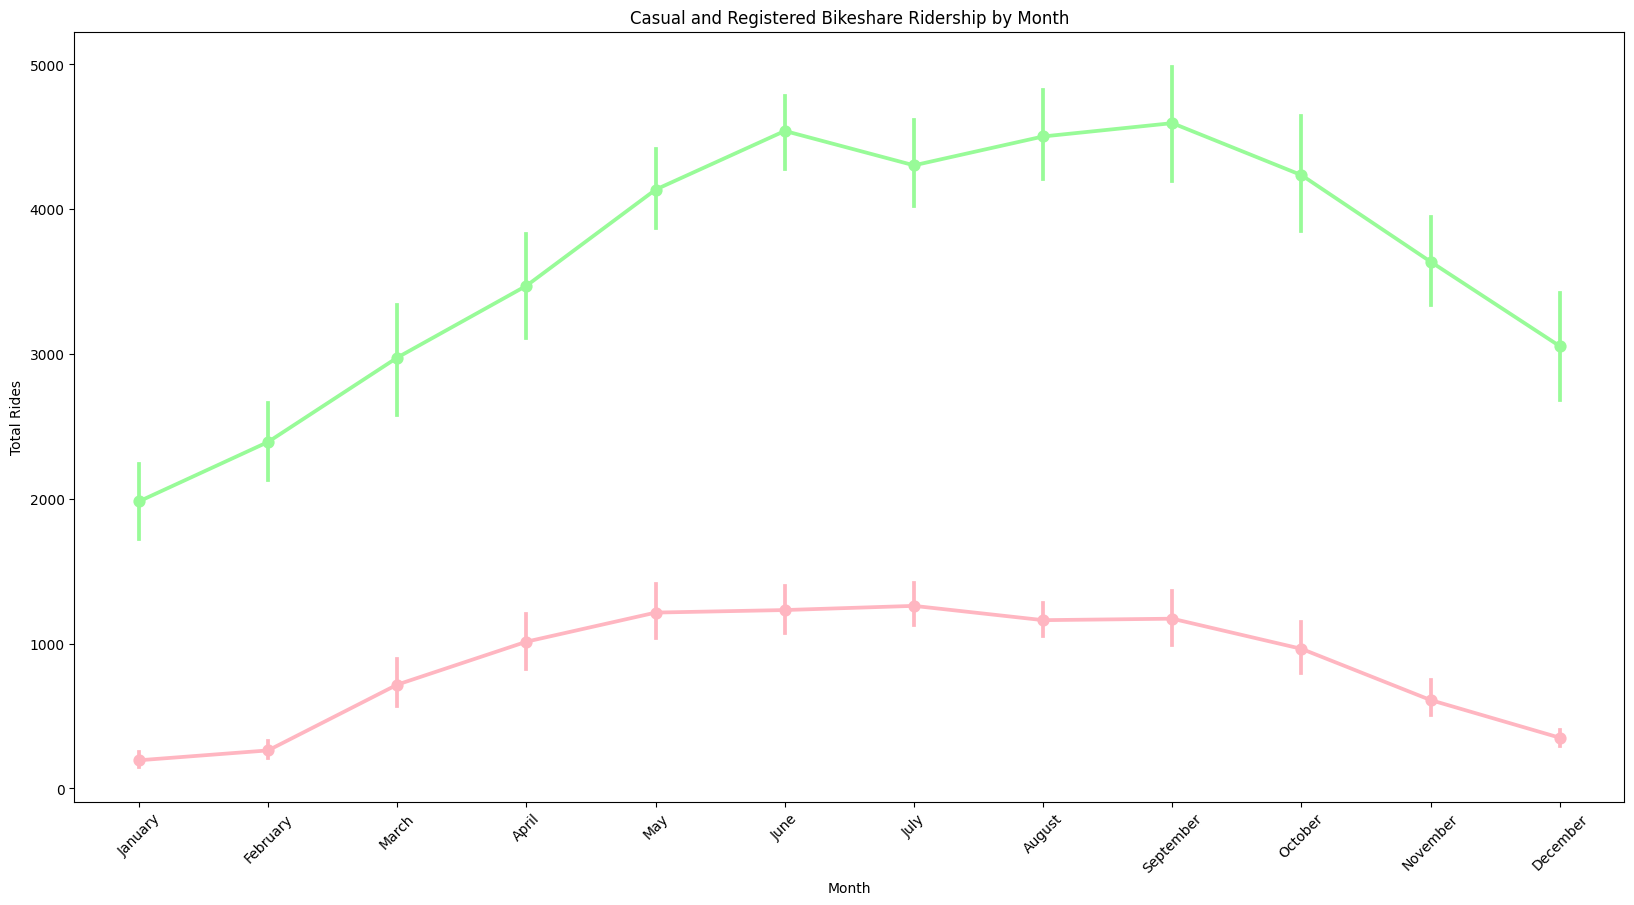

In [36]:
fig, ax = plt.subplots()
colors = ['#FFB6C1', '#98FB98']
sns.pointplot(data=dailysharing_df[['mnth', 'casual', 'registered']],
              x='mnth',
              y='casual',
              ax=ax,
              color=colors[0])

sns.pointplot(data=dailysharing_df[['mnth', 'casual', 'registered']],
              x='mnth',
              y='registered',
              ax=ax,
              color=colors[1])

tick_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab, rotation=45)

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

### **Does the weather affect bikeshare usage?**

*Types of Weather:*

1.Clear, Few clouds, Partly cloudy, Partly cloudy

2.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3.Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

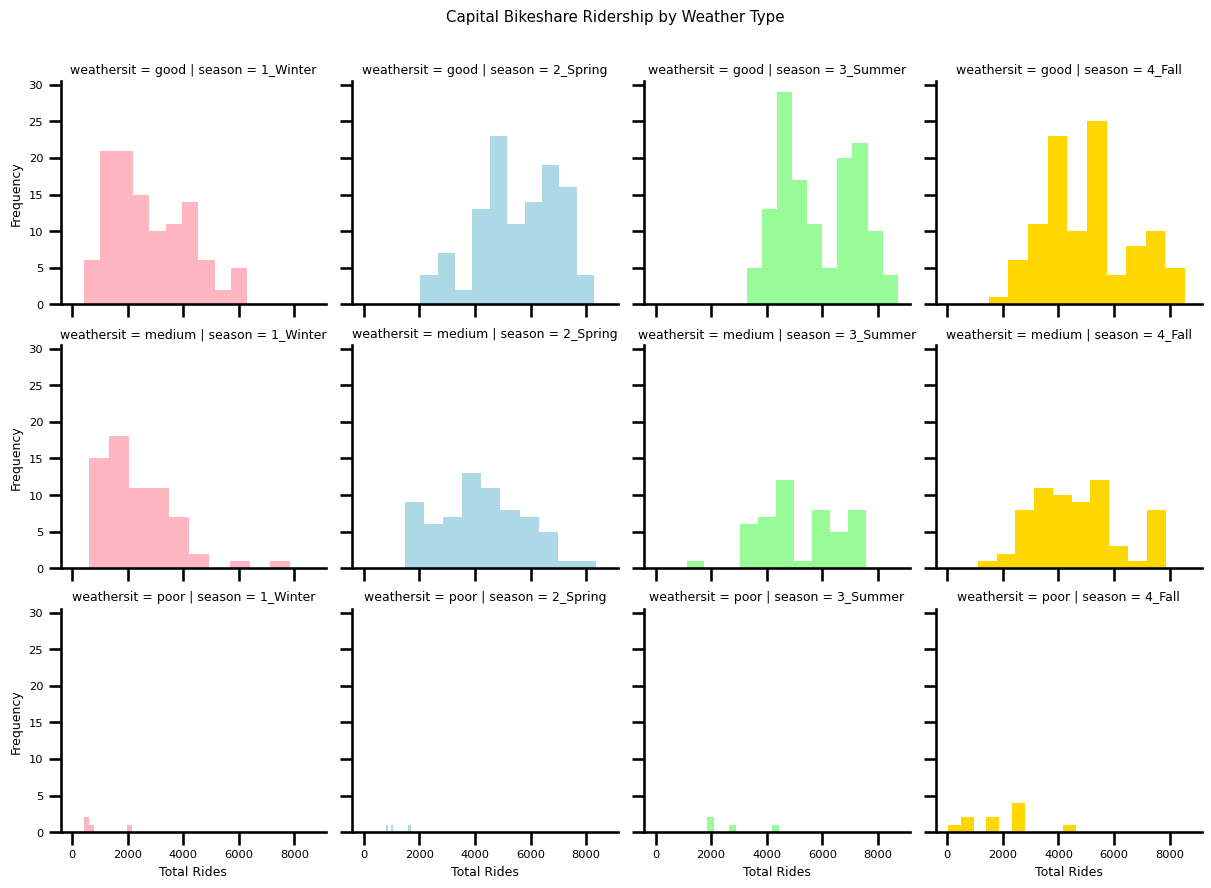

In [37]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context('talk', font_scale=0.5)

g = sns.FacetGrid(data=dailysharing_df,
               col='season',
               row='weathersit', hue='season',
               palette=['#FFB6C1', '#ADD8E6', '#98FB98', '#FFD700'])

g.map(plt.hist, 'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

### **How Patterns Across Years, Months, and Hours. Affect bikeshare usage?**

#### **1). Year**

In [38]:
year_df = dailysharing_df.groupby('yr').instant.nunique().reset_index()
year_df.rename(columns={'instant': 'sum'}, inplace=True)
year_df

,yr,sum
0,0,365
1,1,366


<ipython-input-39-c6b5810d8007>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


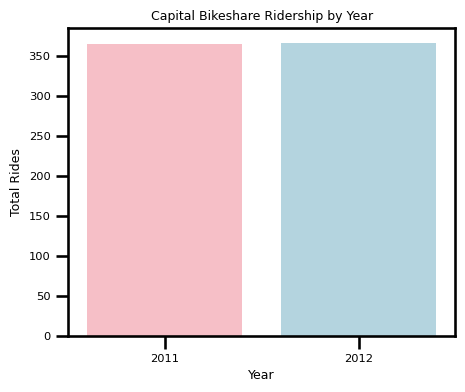

In [39]:
year_df['yr'] = year_df['yr'].map({0: '2011', 1: '2012'})

plt.figure(figsize=(5, 4))
colors = ['#FFB6C1', '#ADD8E6']
sns.barplot(
    data=year_df.sort_values('yr', ascending=False),
    x='yr',
    y='sum',
    palette=colors
)

plt.title('Capital Bikeshare Ridership by Year')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.show()


#### **2). Month**

<ipython-input-40-5181e8166b72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dailysharing_df[['mnth','cnt']], x='mnth', y='cnt', ax=ax, palette='pastel')


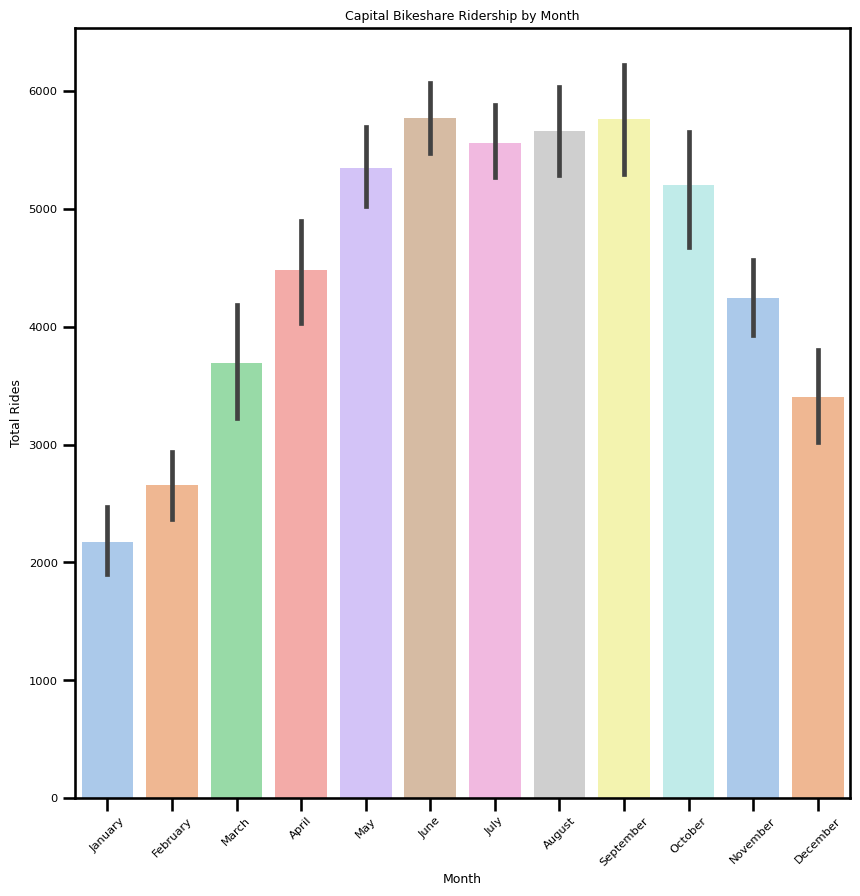

In [40]:
fig, ax = plt.subplots()
sns.barplot(data=dailysharing_df[['mnth','cnt']], x='mnth', y='cnt', ax=ax, palette='pastel')

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(rotation=45)
plt.xticks(tick_val, tick_lab)

plt.show()

#### **2). Hour**

<ipython-input-41-c7762897616a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


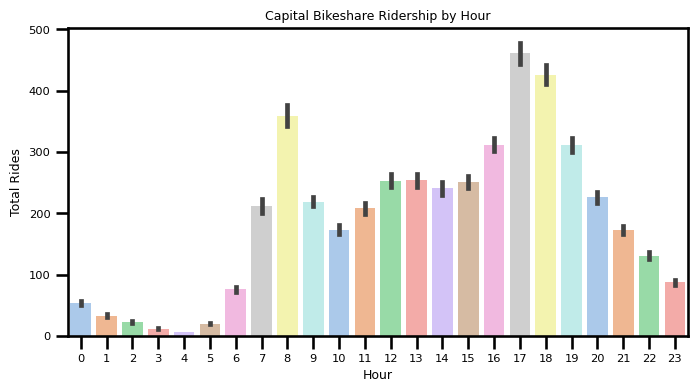

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=hourlysharing_df.sort_values('hr', ascending=False),
    x='hr',
    y='cnt',
    palette='pastel',
)

plt.title('Capital Bikeshare Ridership by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rides')
plt.show()

### **Do holidays affect bikeshare usage?**

In [42]:
holiday_df = dailysharing_df.groupby('holiday').instant.nunique().reset_index()
holiday_df.rename(columns={'instant': 'sum'}, inplace=True)
holiday_df

,holiday,sum
0,False,710
1,True,21


<ipython-input-43-630a63ff5722>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


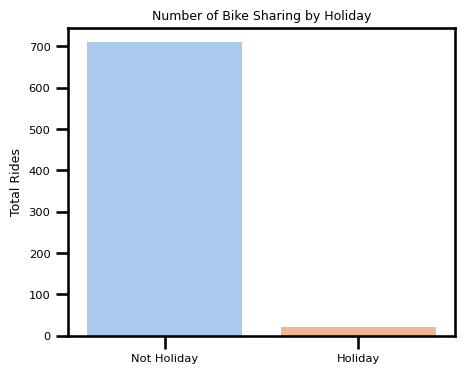

In [43]:
holiday_df['holiday'] = holiday_df['holiday'].map({True: 'Holiday', False: 'Not Holiday'})

plt.figure(figsize=(5, 4))
sns.barplot(
    data=holiday_df.sort_values('holiday', ascending=False),
    x='holiday',
    y='sum',
    palette='pastel'
)

plt.title('Number of Bike Sharing by Holiday')
plt.xlabel(None)
plt.ylabel('Total Rides')
plt.show()

### **Do weekdays affect bikeshare usage?**

In [44]:
workingday_df = dailysharing_df.groupby('workingday').instant.nunique().reset_index()
workingday_df.rename(columns={'instant': 'sum'}, inplace=True)
workingday_df

,workingday,sum
0,False,231
1,True,500


<ipython-input-45-a993f7f06623>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


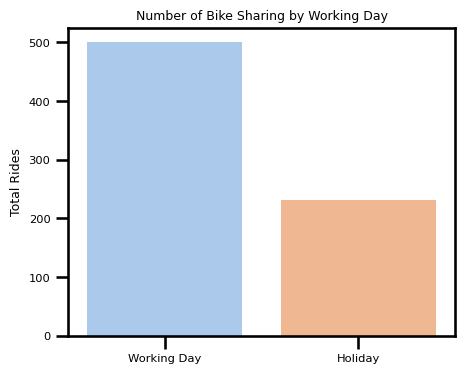

In [45]:

workingday_df['workingday'] = workingday_df['workingday'].map({True: 'Working Day', False: 'Holiday'})

plt.figure(figsize=(5, 4))
sns.barplot(
    data=workingday_df.sort_values('workingday', ascending=False),
    x='workingday',
    y='sum',
    palette='pastel'
)

plt.title('Number of Bike Sharing by Working Day')
plt.xlabel(None)
plt.ylabel('Total Rides')
plt.show()

## **Conclusion**

- Does seasonality affect bikeshare usage? Season is proven to affect bikeshare usage. As in the data visualization above, the number of users is least in winter and most in summer.
- Do usage trends vary by membership type? As in the data visualization above registered riders make more trips than casual riders.
- Does the weather affect bikeshare usage? The type of weather has been shown to have a large impact on ridership. Far fewer passengers ride during snow and thunderstorms than during sunny weather.

## **Pengaruh Lingkungan Terhadap Membership Bike Share**


### **Regression Analysis on Temperature**

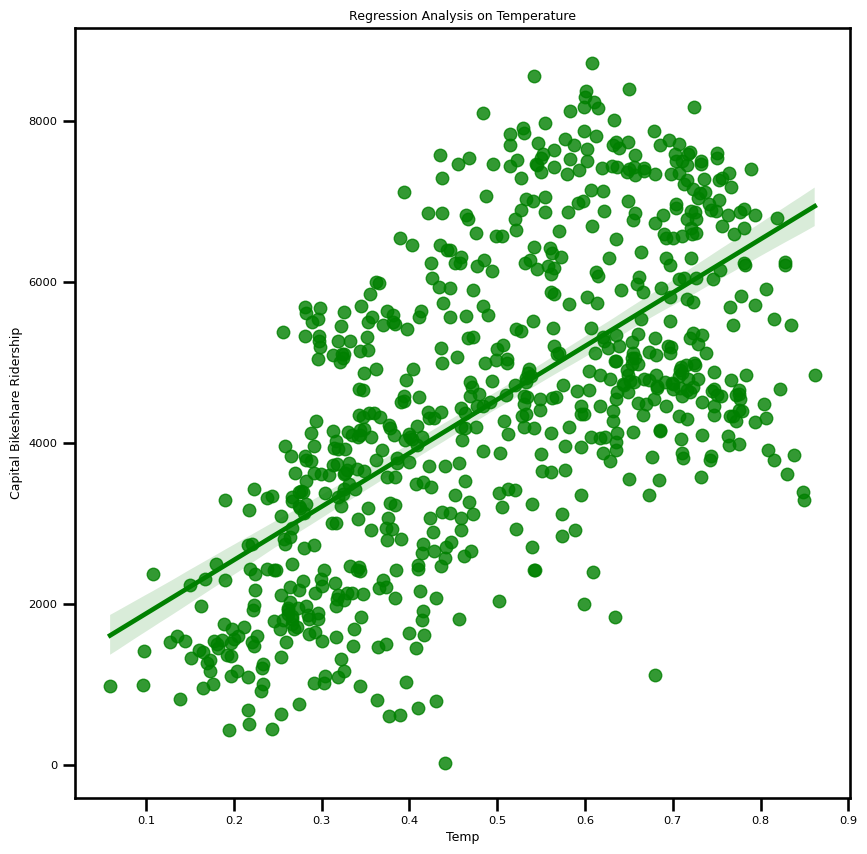

In [46]:
sns.regplot(x=dailysharing_df['temp'], y=dailysharing_df['cnt'], color='green')
plt.title('Regression Analysis on Temperature')
plt.xlabel('Temp')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Regression Analysis on Average Temperature**

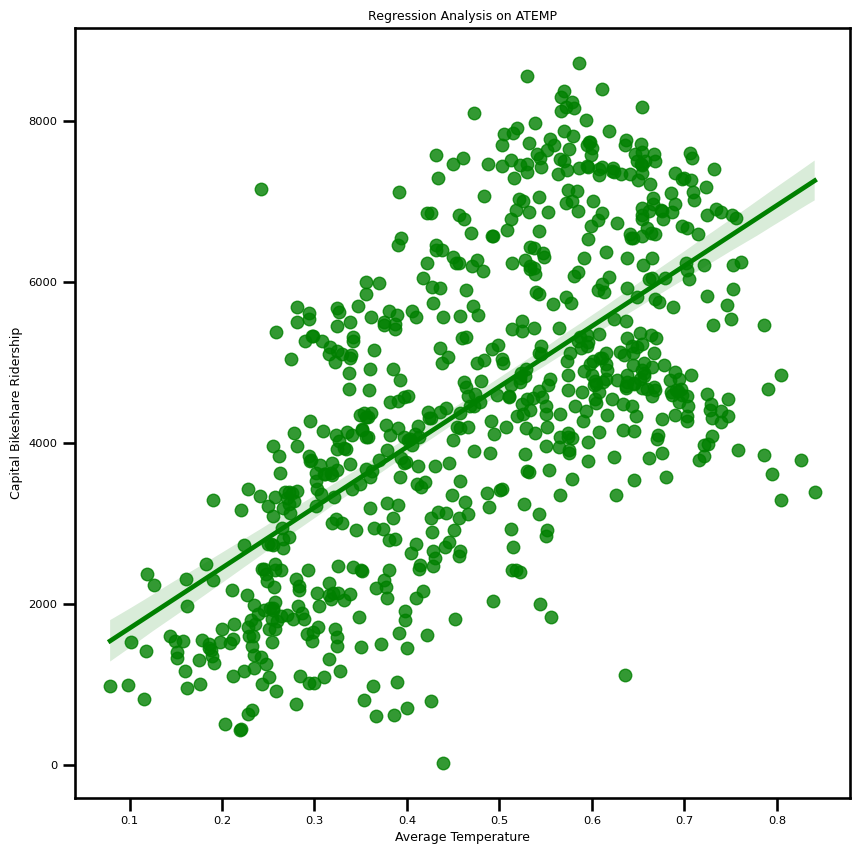

In [47]:
sns.regplot(x=dailysharing_df['atemp'], y=dailysharing_df['cnt'], color='green')
plt.title('Regression Analysis on ATEMP')
plt.xlabel('Average Temperature')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Regression Analysis on Humidity**

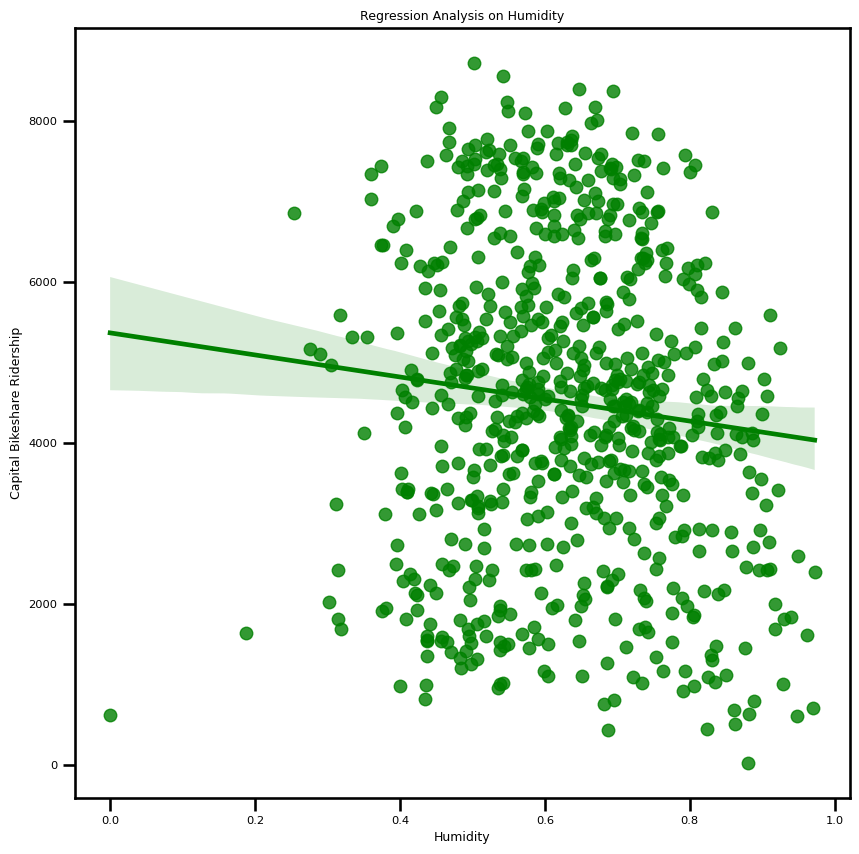

In [48]:

sns.regplot(x=dailysharing_df['hum'], y=dailysharing_df['cnt'], color = 'green')
plt.title('Regression Analysis on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

### **Regression Analysis on Wind Speed**

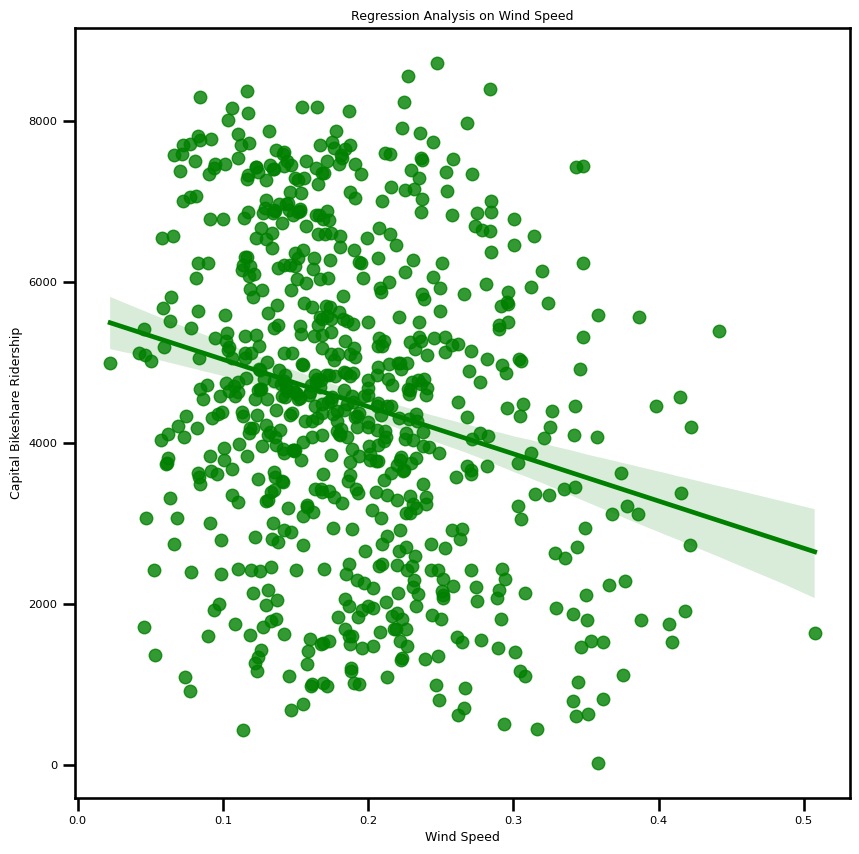

In [49]:
sns.regplot(x=dailysharing_df['windspeed'], y=dailysharing_df['cnt'], color='green')
plt.title('Regression Analysis on Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Capital Bikeshare Ridership')
plt.show()

## **Analysis of Temperature, Humidity, and Wind Speed**

In [50]:
import plotly.express as px
fig = px.scatter_3d(
    dailysharing_df,
    x='temp',
    y='hum',
    z='windspeed',
    color='season'
)
fig.show()

### **Linear Regression**

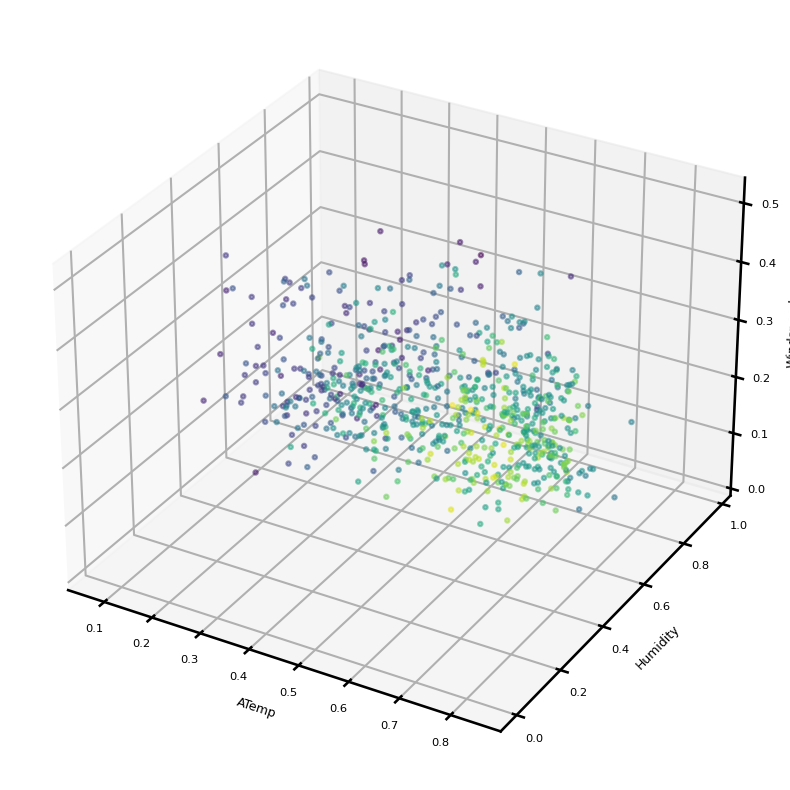

In [51]:
atemp = dailysharing_df['atemp'].values
humidity = dailysharing_df['hum'].values
windspeed = dailysharing_df['windspeed'].values
cnt = dailysharing_df['cnt'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(atemp, humidity, windspeed, c=cnt, cmap='viridis', s=10, alpha=0.5)
ax.set_xlabel('ATemp')
ax.set_ylabel('Humidity')
ax.set_zlabel('Windspeed')
plt.show()

In [52]:
m = len(atemp)
x0 = np.ones((m,1))
X = dailysharing_df[['atemp','hum','windspeed']].values
X = np.concatenate((x0 , X), axis=1)
# Koefisien Awal
theta = np.zeros((4,1))
Y = cnt.reshape(len(cnt),1)
alpha = 0.0001

In [53]:
from numpy.linalg import inv
thetas = np.matmul(np.matmul(inv(np.matmul(X.T,X)), X.T),Y)
thetas

array([[ 3773.95909515],
       [ 7504.0918613 ],
       [-3167.48479155],
       [-4411.66455727]])

These coefficients are the result of fitting a linear regression model to the data provided. They indicate the impact of each feature on the predicted output. Positive coefficients indicate a positive correlation with the target variable, while negative coefficients indicate a negative correlation. For instance:

- A higher coefficient for 'atemp' suggests that an increase in atmospheric temperature leads to a larger increase in the predicted count of whatever 'cnt' represents.
- A negative coefficient for 'hum' suggests that an increase in humidity leads to a decrease in the predicted count.
- Similarly, a negative coefficient for 'windspeed' suggests that higher wind speeds lead to a decrease in the predicted count.

In [54]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return J

In [55]:
inital_cost = cost_function(X, Y, theta)
print(inital_cost)

12018406.44117647


The output **12018406.44117647** represents the initial cost (or error) of the linear regression model before optimization. This value represents the average squared difference between the predicted values and the actual values, normalized by the number of training examples. A lower value indicates a better fit of the model to the training data. This initial cost serves as a baseline for evaluating the performance of the model after optimization.

In [56]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):

        h = X.dot(theta)

        loss = h - Y

        gradient = X.T.dot(loss) / m

        theta = theta - alpha * gradient

        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [57]:
newTheta, cost_history  = gradient_descent(X, Y, theta, alpha, 50000)

print(newTheta)

print(cost_history[-1])

[[2635.18529236]
 [2026.03081617]
 [1361.18942226]
 [ 350.91111067]]
1600493.3184210141


The output represents the updated coefficients (newTheta) and the final cost after running gradient descent optimization. The output indicates that after 50,000 iterations of gradient descent, the parameters of the model have been updated, resulting in a final cost of approximately 1600493.3184210141. This means that the model's predictions are now closer to the actual values compared to the initial set of coefficients, as indicated by the lower cost.

Text(0.5, 0, 'Iteration')

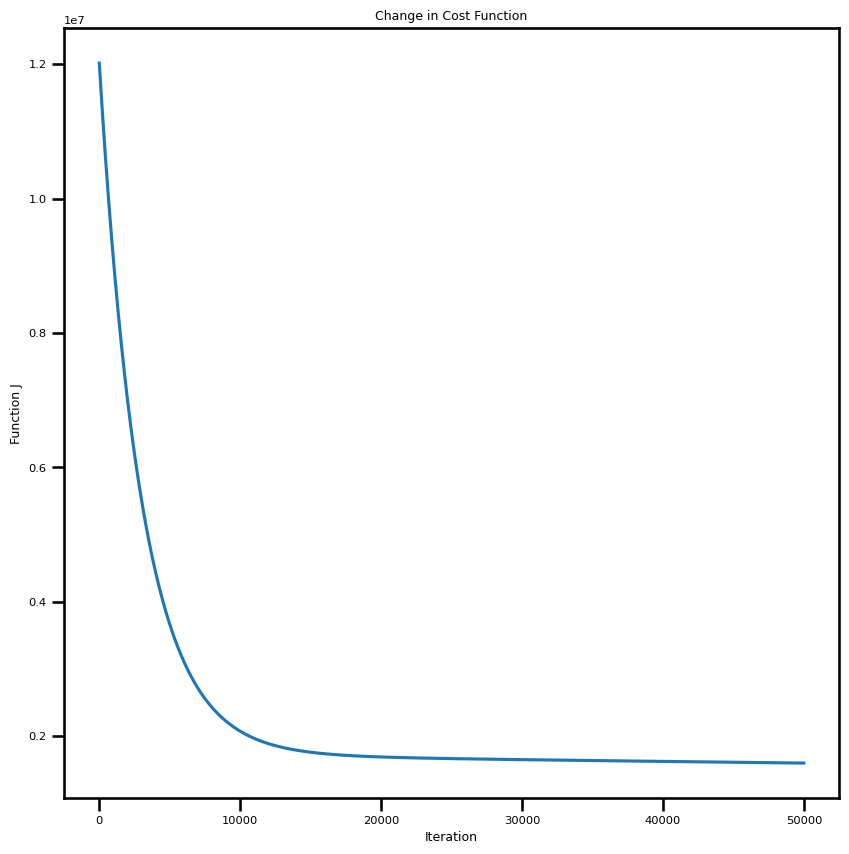

In [58]:
plt.plot(cost_history)
plt.title('Change in Cost Function')
plt.ylabel('Function J')
plt.xlabel('Iteration')

In [59]:
dailysharing_df.to_csv("all_dailysharing_df.csv", index=False)